# Question 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Lagrange Interpolation

In [2]:
X=[1930,1950,1970,1990,2010]  #data based on which we will predict
Y=[28.5,37.6,55.8,87.1,124.1]

#Lagrange interpolation
def lagrange(X,Y,x):   #x is the value we want to predict
    sum=0
    for i in range(len(X)):
        product=1
        for j in range(len(X)):
            if i!=j:
                product*=(x-X[j])/(X[i]-X[j])
        sum+=product*Y[i]
    return sum



### Setting up the normal equations and their solutions

Note: Coefficients would be found in order $x^0, x^1, x^2,...$

In [3]:
#make entries for normal matrix
def x_make(x:list, n:int):
    out=0
    for i in x:
        out+=i**n
    return out

#make entries for b vector in Ax=b
def y_make(x:list,y:list,n:int):
    out=0
    for i in range(len(y)):
        out+=y[i]*x[i]**n
    return out

#make normal matrix and b vector
def normal_make(x:list, y:list, n:int):
    normal_matrix=[0]*(n+1)
    for i in range(n+1):
        temp_vec=np.zeros(n+1)
        for j in range(n+1):
            temp_vec[j]=x_make(x,i+j)
        normal_matrix[i]=temp_vec
    
    target_vec=np.zeros((n+1,1))
    for i in range(n+1):
        target_vec[i]=y_make(x,y,i)

    return (np.asarray(normal_matrix), target_vec)

#solve Ax=b
def solve_eq(A):
    return np.linalg.solve(A[0],A[1]).T[0]

#coefficients would be in the order of x^0,x^1,x^2,.....


#evaluate the polynomial found by least square method
def evaluate(x:float,coefflist):
    out=0
    for i in range(len(coefflist)):   
        out+=coefflist[i]*x**i   #keep in mind that coefflist is in the order of x^0,x^1,x^2,...
    return out

#find the rmse
def rmse(x:list,y:list):
    out=0
    for i in range(len(x)):
        out+=(x[i]-y[i])**2
    return (out/len(x))**0.5


In [4]:
normal_sys_3=normal_make(X,Y,3)
coeff_3=solve_eq(normal_sys_3)  #coefficients of cubic polynomial

X_predict=[1940,1960,1980,2000,2020]   #data to be predicted
Y_actual=[32.4,45.1,69.7,105.7,139.6]  #actual data
Y_predict_3=[evaluate(i,coeff_3) for i in X_predict]  #predicted data using cubic polynomial
Y_predict_lagrange=[lagrange(X,Y,i) for i in X_predict] #predicted data using lagrange interpolation

#make a dataframe to print the output
out_dict={'Year':X_predict,'Actual':Y_actual,'Cubic':Y_predict_3,'Lagrange':Y_predict_lagrange}

df=pd.DataFrame(out_dict,index=None)
print(df)

df.to_latex('output2.tex',index=False) #save the output in latex format for report

print("Cubic Least Square RMSE: ", rmse(Y_actual,Y_predict_3))
print("Lagrange RMSE: ", rmse(Y_actual,Y_predict_lagrange))


   Year  Actual       Cubic    Lagrange
0  1940    32.4   31.256881   32.607812
1  1960    45.1   45.526503   45.045313
2  1980    69.7   70.488502   70.007812
3  2000   105.7  104.443833  105.795312
4  2020   139.6  145.693447  139.307812
Cubic Least Square RMSE:  2.8572160347787467
Lagrange RMSE:  0.21697156531732514


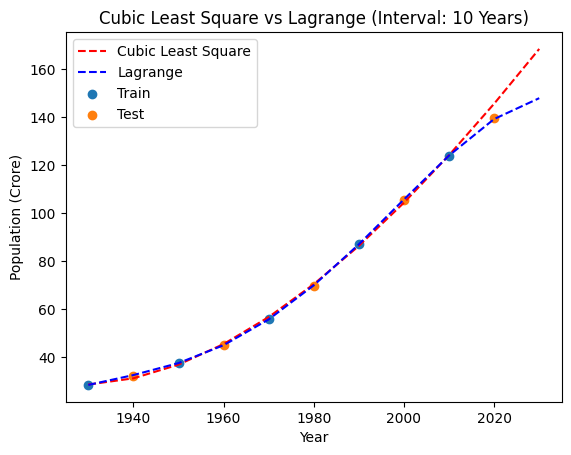

In [5]:
x=np.arange(1930,2040,10)  #take 10 year interval
y_3=[evaluate(i,coeff_3) for i in x]  #predicted data using cubic polynomial
y_lagrange=[lagrange(X,Y,i) for i in x]  #predicted data using lagrange interpolation

plt.plot(x,y_3,label="Cubic Least Square",color="red",linestyle="dashed")
plt.plot(x,y_lagrange,label="Lagrange",color="blue",linestyle="dashed")
plt.scatter(X,Y,label="Train")
plt.scatter(X_predict,Y_actual,label="Test")
plt.xlabel("Year")
plt.ylabel("Population (Crore)")
plt.title("Cubic Least Square vs Lagrange (Interval: 10 Years)")
plt.legend()
plt.show()



Quartic Least Square RMSE:  2.801914334271028


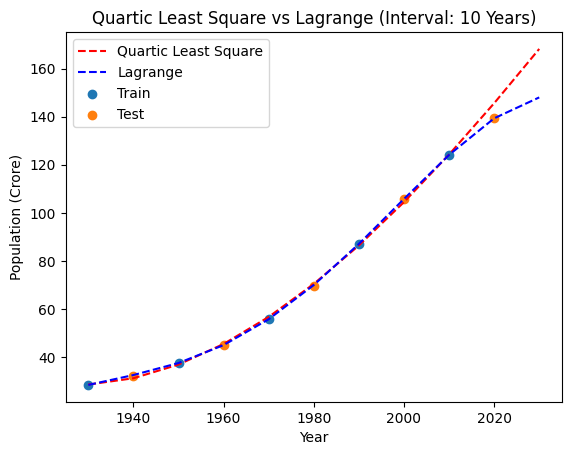

In [6]:
normal_sys_4=normal_make(X,Y,4)  #normal matrix and b vector for quartic polynomial
coeff_4=solve_eq(normal_sys_4)  #coefficients of quartic polynomial
Y_predict_4=[evaluate(i,coeff_4) for i in X_predict]   #predicted data using quartic polynomial
y_4=[evaluate(i,coeff_4) for i in x]
print("Quartic Least Square RMSE: ", rmse(Y_actual,Y_predict_4)) #rmse for quartic polynomial

plt.plot(x,y_4,label="Quartic Least Square",color="red",linestyle="dashed")
plt.plot(x,y_lagrange,label="Lagrange",color="blue",linestyle="dashed")
plt.scatter(X,Y,label="Train")
plt.scatter(X_predict,Y_actual,label="Test")
plt.xlabel("Year")
plt.ylabel("Population (Crore)")
plt.title("Quartic Least Square vs Lagrange (Interval: 10 Years)")
plt.legend()
plt.show()


In [7]:
import sympy as sp

x=sp.symbols('x')
y=sp.symbols('y')


def lagrange_symbolic(X,Y,x):
    sum=0
    for i in range(len(X)):
        product=1
        for j in range(len(X)):
            if i!=j:
                product*=(x-X[j])/(X[i]-X[j])
        sum+=product*Y[i]
    return sum

expr=sp.expand(lagrange_symbolic(X,Y,x))

print("Lagrange Symbolic Expanded: ", expr)


#use coeff_3 to get the symbolic expression

print("Cubic Least Square Symbolic: ", coeff_3[0]+coeff_3[1]*x+coeff_3[2]*x**2+coeff_3[3]*x**3)

print("Quartic Least Square Symbolic: ", coeff_4[0]+coeff_4[1]*x+coeff_4[2]*x**2+coeff_4[3]*x**3+coeff_4[4]*x**4)

print('\n')
print("Note: 1eX means 1*10^X")

Lagrange Symbolic Expanded:  -2.96875000000001e-6*x**4 + 0.0233583333333334*x**3 - 68.9016562499999*x**2 + 90308.514166666*x - 44376964.2046875
Cubic Least Square Symbolic:  -3.53968126740119e-5*x**3 + 0.221498730872661*x**2 - 459.338889052604*x + 315961.799839495
Quartic Least Square Symbolic:  -5.01780175850323e-8*x**4 + 0.000359808341313564*x**3 - 0.945659612989846*x**2 + 1072.52885155514*x - 437933.230898847


Note: 1eX means 1*10^X
